In [578]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [579]:
df = pd.read_csv(r'C:\Users\User\Downloads\dataset\insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Explanation of the features:

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [580]:
df.shape

(1338, 7)

In [581]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [582]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Check how many categories there are in "region":

In [583]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

#### Conversion from string to numbers:

In [584]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['sex']=pd.get_dummies(df['sex'])
df['smoker']=pd.get_dummies(df['smoker'])
df['region'] = labelencoder.fit_transform(df['region'])
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,3,16884.92400
1,18,0,33.770,1,1,2,1725.55230
2,28,0,33.000,3,1,2,4449.46200
3,33,0,22.705,0,1,1,21984.47061
4,32,0,28.880,0,1,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,1,10600.54830
1334,18,1,31.920,0,1,0,2205.98080
1335,18,1,36.850,0,1,2,1629.83350
1336,21,1,25.800,0,1,3,2007.94500


#### check for null values

In [585]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

,age,sex,bmi,children,smoker,region,charges,bmi2,age2
0,19,1,27.900,0,0,3,16884.92400,2.7900,1.9
1,18,0,33.770,1,1,2,1725.55230,3.3770,1.8
2,28,0,33.000,3,1,2,4449.46200,3.3000,2.8
3,33,0,22.705,0,1,1,21984.47061,2.2705,3.3
4,32,0,28.880,0,1,1,3866.85520,2.8880,3.2
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,1,10600.54830,3.0970,5.0
1334,18,1,31.920,0,1,0,2205.98080,3.1920,1.8
1335,18,1,36.850,0,1,2,1629.83350,3.6850,1.8
1336,21,1,25.800,0,1,3,2007.94500,2.5800,2.1


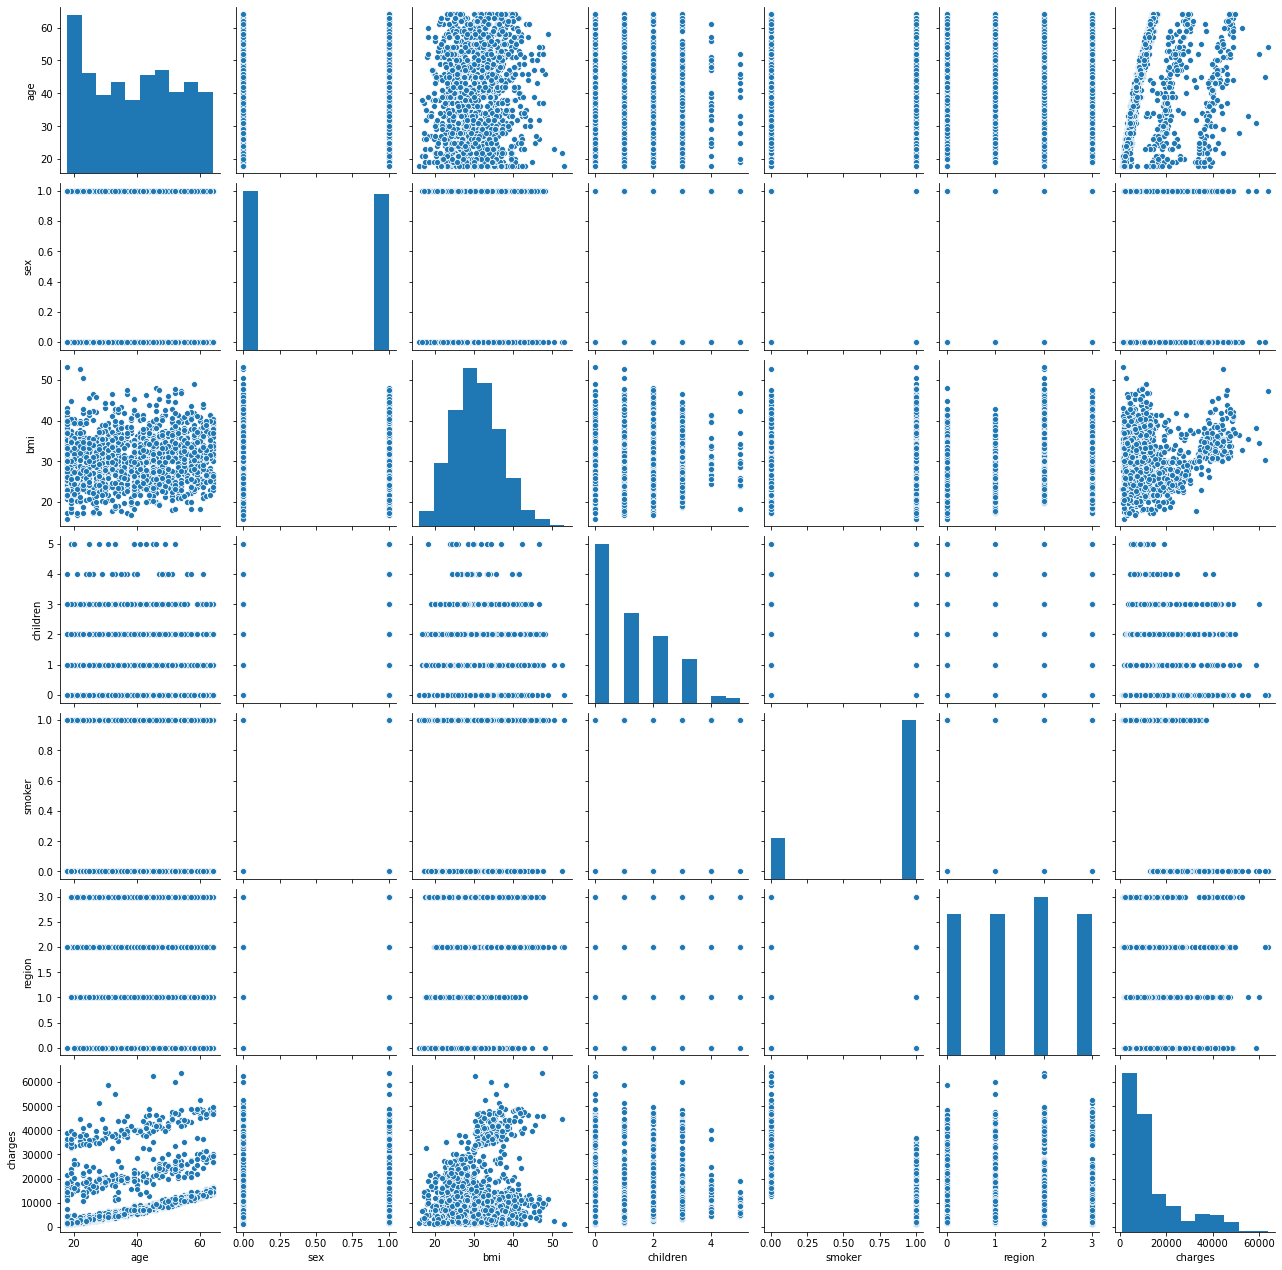

In [587]:
sns.pairplot(df)

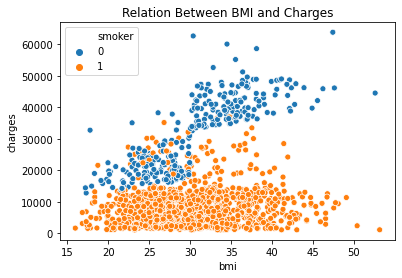

In [588]:
plt.title('Relation Between BMI and Charges')
sns.scatterplot(x = df['bmi'], y= df['charges'] , hue = df['smoker'])
plt.show()

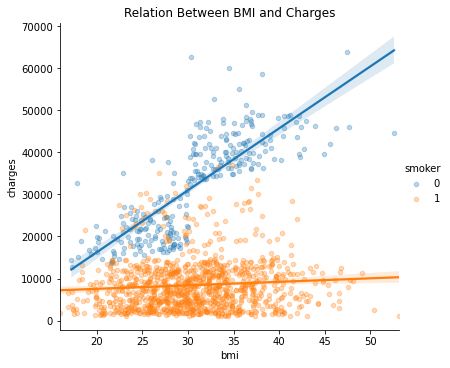

In [589]:
sns.lmplot(data=df, x='bmi', y='charges', hue='smoker', scatter_kws={"alpha": .3, "s": 20}, height=5, aspect=1.15)
plt.title('Relation Between BMI and Charges')
plt.show()

There is a connection between the bmi of non-smokers and charges. An increase in bmi leads to an increase in charges

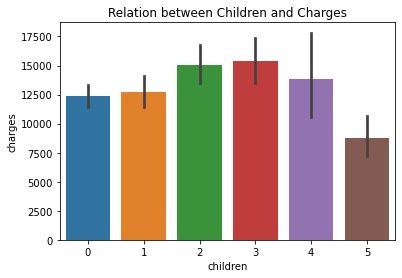

In [590]:
plt.title('Relation between Children and Charges')
sns.barplot(x=df['children'], y=df['charges'])

People who have 2 or 3 children have a higher charges than the rest.
In contrast, people who have 5 children have lower charges.

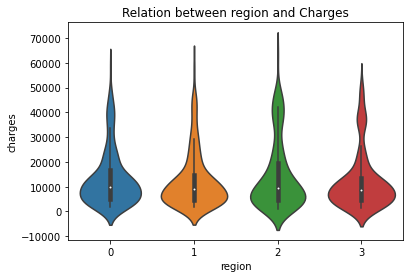

In [591]:
sns.violinplot(data=df, x="region", y="charges")
plt.title('Relation between region and Charges')
plt.show()

In region 2 the charges are little higher than the rest.

# Correlation

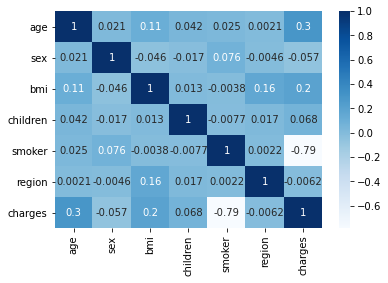

In [592]:
sns.heatmap(df.corr() , cmap = 'Blues' , annot = True)

It can be seen that what mainly affects the charges is the: age, bmi and smoker.

# Division of data

In [612]:
from sklearn.model_selection import train_test_split
x = df.drop(labels = ['charges', 'age2', 'bmi2'], axis=1)
y = df.charges
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.3 , random_state = 2)
print (x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(936, 6) (402, 6)
(936,) (402,)


# KNN Regressor Model

#### Check which k gives the highest accuracy:

the maximum r2 score is: 17.61708324855119% while k=18


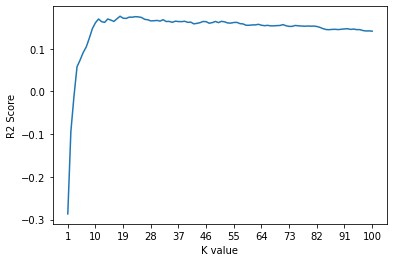

In [613]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score , mean_squared_error
arr = []
for k in range(1,101):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    knn_pred = knn.predict(x_test)
    arr.append(r2_score(y_test, knn_pred))

plt.plot(range(1,101), arr)
plt.xticks(np.arange(1,101,9))
plt.xlabel("K value")
plt.ylabel("R2 Score")

knn_r2 = max(arr)
print ("the maximum r2 score is: " + str(knn_r2*100) + "% while k=18")

#### Check which cv gives the highest mean of cross validation score:

the maximum mean of cross validation score is: 14.796980184326891% while cv=7


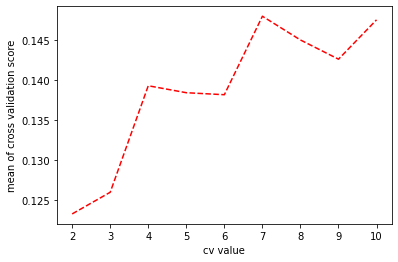

In [614]:
arr = []
for i in range(2,11):
    knn = KNeighborsRegressor(n_neighbors=18)
    knn.fit(x_train, y_train)
    scores = cross_val_score(knn, x, y, cv=i)
    arr.append(scores.mean())
    
plt.plot(range(2,11), arr, 'r--')
plt.xticks(np.arange(2,11,1))
plt.xlabel("cv value")
plt.ylabel("mean of cross validation score")

knn_cros = max(arr)
print ("the maximum mean of cross validation score is: " + str(knn_cros*100) + "% while cv=7")

### Summary of best results:

In [616]:
from sklearn.metrics import mean_absolute_error
knn_pred = knn.predict(x_test)
knn_MAE = mean_absolute_error(y_test, knn_pred)
print('r2 score: ' + str(knn_r2*100) + '%')
print('mean of cross validation score: ' + str(knn_cros*100) + '%')
print('mean absolute error: ' + str(knn_MAE))

r2 score: 17.61708324855119%
mean of cross validation score: 14.796980184326891%
mean absolute error: 8576.213990166803


#### Comparison between real values and predicted values:

In [617]:
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real Values"])
y_pred_df = pd.DataFrame(knn_pred, columns=["Predicted Values" ])
pd.concat([y_test_df , y_pred_df] , axis=1)

,Real Values,Predicted Values
0,2395.17155,8160.571276
1,11286.53870,15398.966589
2,9617.66245,13507.967102
3,1719.43630,7758.906112
4,8891.13950,14287.325320
...,...,...
397,23288.92840,7397.107774
398,12479.70895,17303.281386
399,40103.89000,19388.401059
400,43578.93940,15699.366690


I will try to improve results by normalizing the data:

## normalization

In [ ]:
df['bmi2'] = df.apply(lambda row: (row.bmi * 0.1), axis = 1)
df['age2'] = df.apply(lambda row: (row.age * 0.1), axis = 1)
df

# Division of data

In [619]:
from sklearn.model_selection import train_test_split
x = df.drop(labels = ['charges', 'age', 'bmi'], axis=1)
y = df.charges
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.3 , random_state = 2)
print (x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(936, 6) (402, 6)
(936,) (402,)


# KNN Regressor Model

#### Check which k gives the highest accuracy:

the maximum r2 score is: 66.1270253830788% while k=3


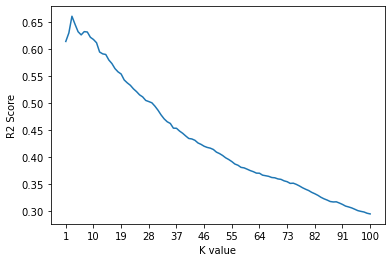

In [621]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score , mean_squared_error
arr = []
for k in range(1,101):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    knn_pred = knn.predict(x_test)
    arr.append(r2_score(y_test, knn_pred))

plt.plot(range(1,101), arr)
plt.xticks(np.arange(1,101,9))
plt.xlabel("K value")
plt.ylabel("R2 Score")

knn_r2 = max(arr)
print ("the maximum r2 score is: " + str(knn_r2*100) + "% while k=3")

#### Check which cv gives the highest mean of cross validation score:

the maximum mean of cross validation score is: 59.4631365066254% while cv=10


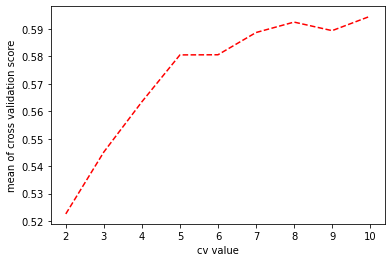

In [625]:
arr = []
for i in range(2,11):
    knn = KNeighborsRegressor(n_neighbors=18)
    knn.fit(x_train, y_train)
    scores = cross_val_score(knn, x, y, cv=i)
    arr.append(scores.mean())
    
plt.plot(range(2,11), arr, 'r--')
plt.xticks(np.arange(2,11,1))
plt.xlabel("cv value")
plt.ylabel("mean of cross validation score")

knn_cros = max(arr)
print ("the maximum mean of cross validation score is: " + str(knn_cros*100) + "% while cv=10")

### Summary of best results:

In [626]:
from sklearn.metrics import mean_absolute_error
knn_pred = knn.predict(x_test)
knn_MAE = mean_absolute_error(y_test, knn_pred)
print('r2 score: ' + str(knn_r2*100) + '%')
print('mean of cross validation score: ' + str(knn_cros*100) + '%')
print('mean absolute error: ' + str(knn_MAE))

r2 score: 66.1270253830788%
mean of cross validation score: 59.4631365066254%
mean absolute error: 5111.869559368159


#### Comparison between real values and predicted values:

In [627]:
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real Values"])
y_pred_df = pd.DataFrame(knn_pred, columns=["Predicted Values" ])
pd.concat([y_test_df , y_pred_df] , axis=1)

,Real Values,Predicted Values
0,2395.17155,3185.622652
1,11286.53870,13343.861349
2,9617.66245,11535.026843
3,1719.43630,3363.841786
4,8891.13950,9538.156498
...,...,...
397,23288.92840,6891.387236
398,12479.70895,13699.415483
399,40103.89000,21624.774469
400,43578.93940,20824.347396


#### It can be seen that there is a significant preservation in the model results after normalization

# Linear Regresson Model

#### Comparison between real values and predicted values:

In [606]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(x_train, y_train)
LinReg_pred = LinReg.predict(x_test)
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real Values"])
y_pred_df = pd.DataFrame(LinReg_pred, columns=["Predicted Values" ])
pd.concat([y_test_df , y_pred_df] , axis=1)

,Real Values,Predicted Values
0,2395.17155,2026.089786
1,11286.53870,12050.784098
2,9617.66245,10492.132951
3,1719.43630,2493.021730
4,8891.13950,8319.412496
...,...,...
397,23288.92840,4158.753605
398,12479.70895,11431.257986
399,40103.89000,33228.937538
400,43578.93940,35935.918239


#### Check which cv gives the highest mean of cross validation score:

the maximum mean of cross validation score is: 74.86033254037109% while cv=2


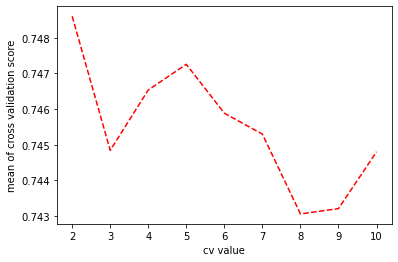

In [607]:
arr = []
for i in range(2,11):
    scores = cross_val_score(LinReg, x, y, cv=i)
    arr.append(scores.mean())
    
plt.plot(range(2,11), arr, 'r--')
plt.xticks(np.arange(2,11,1))
plt.xlabel("cv value")
plt.ylabel("mean of cross validation score")

LinReg_cros = max(arr)
print ("the maximum mean of cross validation score is: " + str(LinReg_cros*100) + "% while cv=2")

### Summary of best results:

In [608]:
LinReg_r2 = r2_score(y_test, LinReg_pred)
LinReg_MAE = mean_absolute_error(y_test, LinReg_pred)
print('r2 score: ' + str(LinReg_r2*100) + '%')
print('mean of cross validation score: ' + str(LinReg_cros*100) + '%')
print('mean absolute error: ' + str(LinReg_MAE))

r2 score: 76.48415301644246%
mean of cross validation score: 74.86033254037109%
mean absolute error: 4288.95751355982


# Random Forest Model

#### Check which max depth gives the highest accuracy:

the maximum r2 score is: 87.94346474663679% while max depth=4


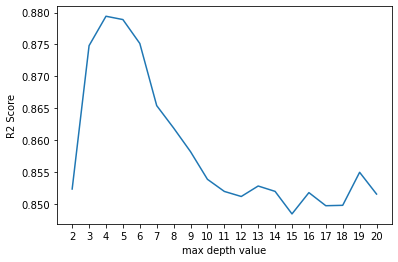

In [609]:
from sklearn.ensemble import RandomForestRegressor
arr = []
for i in range(2,21):
    ran = RandomForestRegressor(max_depth=i)
    ran.fit(x_train, y_train)
    arr.append(r2_score(y_test, ran.predict(x_test)))

plt.plot(range(2,21), arr)
plt.xticks(np.arange(2,21,1))
plt.xlabel("max depth value")
plt.ylabel("R2 Score")

ran_r2 = max(arr)
print ("the maximum r2 score is: " + str(ran_r2*100) + "% while max depth=4")

#### Comparison between real values and predicted values:

In [610]:
ran = RandomForestRegressor(max_depth=4)
ran.fit(x_train, y_train)
ran_pred = ran.predict(x_test)
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real Values"])
y_pred_df = pd.DataFrame(ran_pred, columns=["Predicted Values" ])
pd.concat([y_test_df , y_pred_df] , axis=1)

,Real Values,Predicted Values
0,2395.17155,4822.807162
1,11286.53870,12944.683303
2,9617.66245,11418.401833
3,1719.43630,4464.996013
4,8891.13950,10375.104609
...,...,...
397,23288.92840,6425.427366
398,12479.70895,14507.920322
399,40103.89000,39725.041470
400,43578.93940,46276.596377


#### Check which cv gives the highest mean of cross validation score:

the maximum mean of cross validation score is: 85.78172133659173% while cv=2


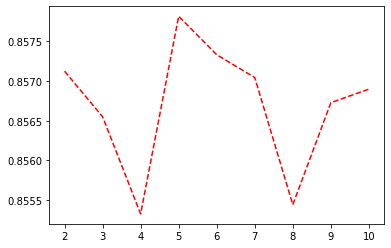

In [611]:
arr = []
for i in range(2,11):
    ran = RandomForestRegressor(max_depth=4)
    ran.fit(x_train, y_train)
    scores = cross_val_score(ran, x, y, cv=i)
    arr.append(scores.mean())
    
plt.plot(range(2,11), arr, 'r--')
plt.xticks(np.arange(2,11,1))

ran_cros = max(arr)
print ("the maximum mean of cross validation score is: " + str(ran_cros*100) + "% while cv=2")

### Summary of best results:

In [575]:
ran_pred = ran.predict(x_test)
ran_MAE = mean_absolute_error(y_test, ran_pred)
print('r2 score: ' + str(ran_r2*100) + '%')
print('mean of cross validation score: ' + str(ran_cros*100) + '%')
print('mean absolute error: ' + str(ran_MAE))

r2 score: 88.04155038148977%
mean of cross validation score: 85.94224892973202%
mean absolute error: 2438.3008575903054


# Comparison between the models

Text(0, 0.5, 'r2 score (%)')

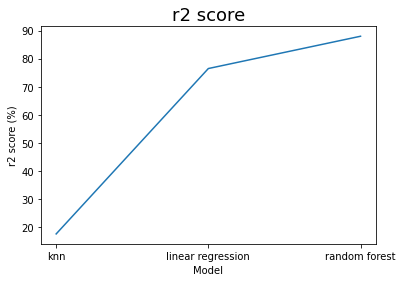

In [451]:
arrX = ['knn', 'linear regression', 'random forest']
arrY = [knn_r2*100, LinReg_r2*100, ran_r2*100]
plt.plot (arrX, arrY)
plt.title("r2 score", fontsize = 18)
plt.xlabel("Model")
plt.ylabel("r2 score (%)")

Text(0, 0.5, 'mean of cross validation score (%)')

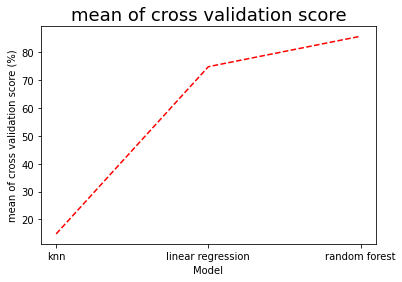

In [452]:
arrX = ['knn', 'linear regression', 'random forest']
arrY = [knn_cros*100, LinReg_cros*100, ran_cros*100]
plt.plot (arrX, arrY, 'r--')
plt.title("mean of cross validation score", fontsize = 18)
plt.xlabel("Model")
plt.ylabel("mean of cross validation score (%)")

Text(0, 0.5, 'mean absolute error: (%)')

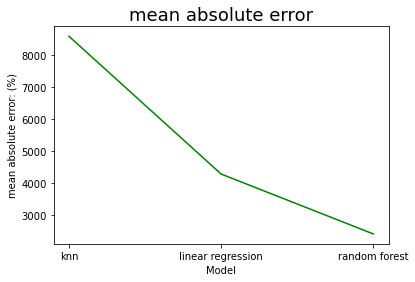

In [465]:
arrX = ['knn', 'linear regression', 'random forest']
arrY = [knn_MAE, LinReg_MAE, ran_MAE]
plt.plot (arrX, arrY, 'g')
plt.title("mean absolute error", fontsize = 18)
plt.xlabel("Model")
plt.ylabel("mean absolute error: (%)")